# Install Packages

In [12]:
pip install ISLP

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

from ISLP import confusion_table

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN

# Load Dataset

In [47]:
data = load_data('Weekly')
data.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


(a) Produce some numerical and graphical summaries of the Weekly data. Comment on the summaries. Are there any patterns?

In [48]:
data.shape

(1089, 9)

In [49]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


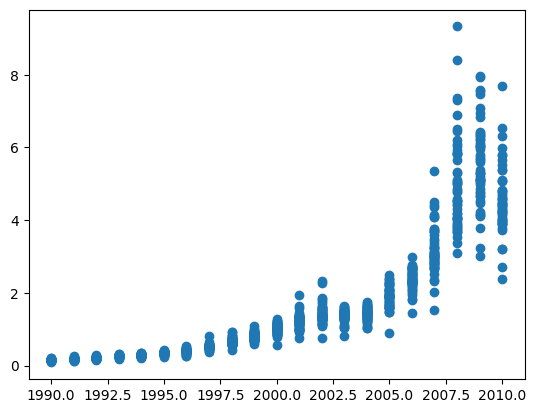

In [50]:
# visualize or analyze
import matplotlib.pyplot as plt
plt.scatter(data.Year, data.Volume)
plt.show()

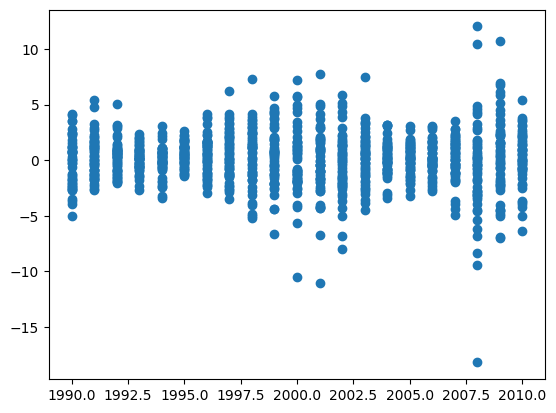

In [51]:
plt.scatter(data.Year, data.Lag5)
plt.show()

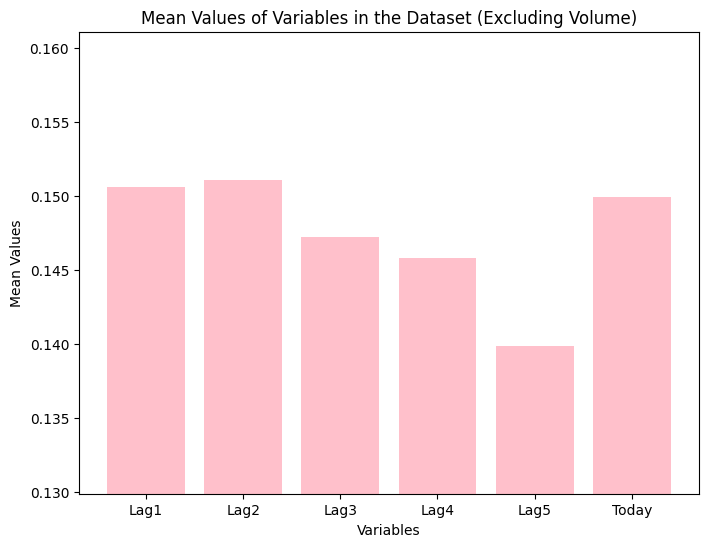

In [52]:
# Mean values for each lag and today
means_excl_volume = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today']].mean()
variables_excl_volume = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today']

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(variables_excl_volume, means_excl_volume, color='pink')
plt.xlabel('Variables')
plt.ylabel('Mean Values')
plt.title('Mean Values of Variables in the Dataset (Excluding Volume)')

# Adjust the y-axis to zoom in on the data
plt.ylim(min(means_excl_volume) - .01, max(means_excl_volume) + .01)

plt.show()


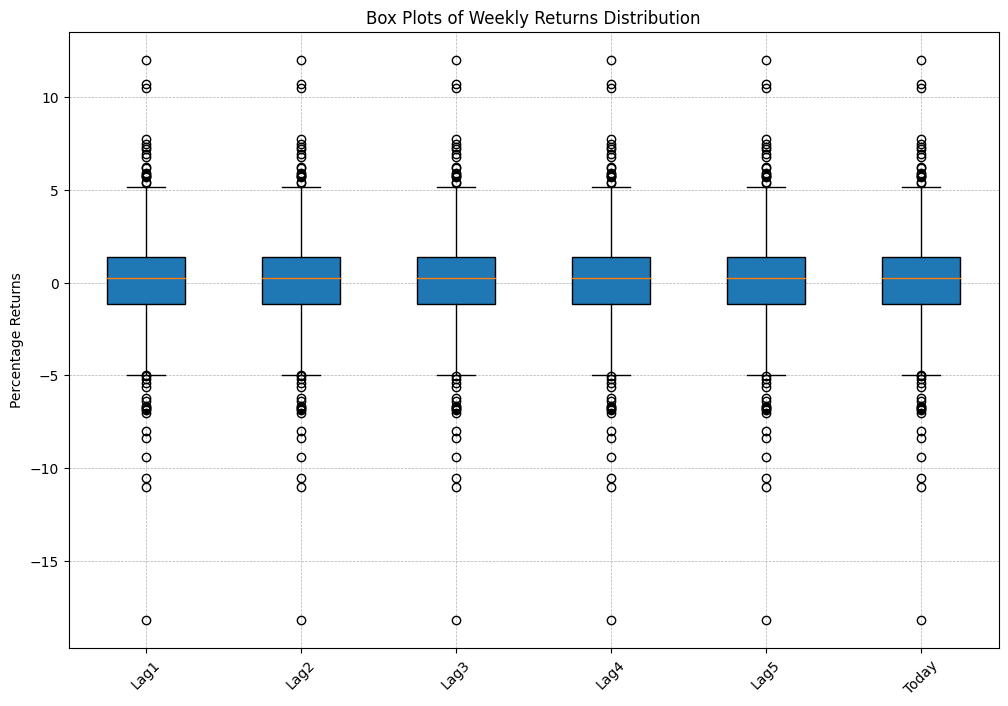

In [53]:
# Selecting the variables for the box plots
data_to_plot = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today']]

# Creating the box plots
plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot.values, labels=data_to_plot.columns, patch_artist=True)
plt.title('Box Plots of Weekly Returns Distribution')
plt.ylabel('Percentage Returns')
plt.xticks(rotation=45)  # Rotate variable names for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

<ipython-input-54-9f0c6f3c33f1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


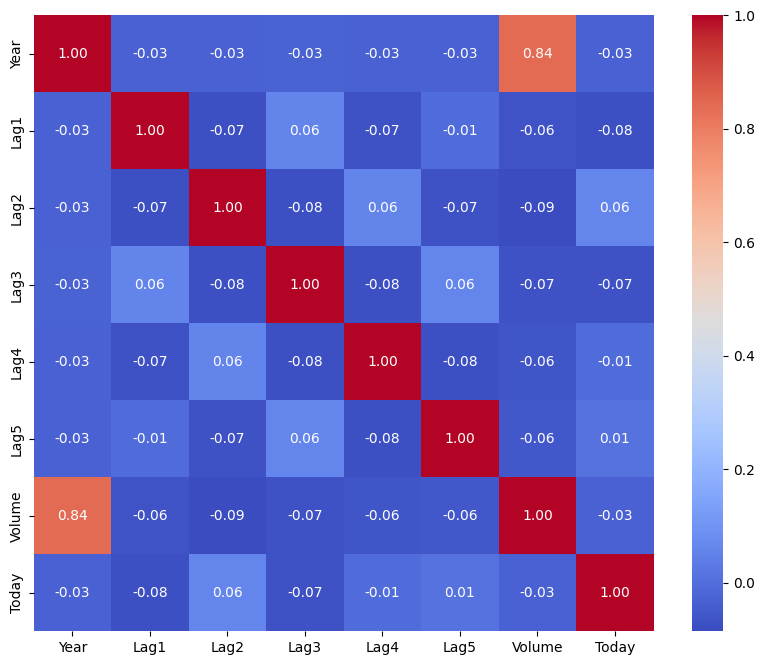

In [54]:
import seaborn as sns

# Assuming 'data' is your DataFrame
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns.values, yticklabels=corr.columns.values)

plt.show()



(b) Use the complete data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [55]:
predictors = data.columns.drop(['Direction','Year', 'Today'])
design = MS(predictors)
X = design.fit_transform(data)
y = data.Direction == 'Up'

In [56]:
X.head(5)

,intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,1.0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,1.0,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,1.0,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,1.0,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,1.0,0.712,3.514,-2.576,-0.270,0.816,0.153728


In [57]:
y.head(5)

0    False
1    False
2     True
3     True
4     True
Name: Direction, dtype: bool

Logistic Regression

In [58]:
lr_model = sm.GLM(y, X, family=sm.families.Binomial()) # Create the LR model
result = lr_model.fit() # train the LR model
summarize(result)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix tells you about the types of mistakes made by logistic regression.

In [59]:
lr_pred = result.predict()
labels = np.array(['Down'] * len(data))
labels[lr_pred > 0.5] = 'Up'
confusion_table(labels, data.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [60]:
(54+557)/(54+48+430+557)

0.5610651974288338

(d) Now fit the logistic regression model using a training data period from 1990 to 2008. Compute the confusion matrix and the overall fraction of correct predictions for the held-out data (the data from 2009 and 2010).

In [61]:
predictors = data.columns.drop(['Direction', 'Today'])
design = MS(predictors)
X = design.fit_transform(data)
y = data.Direction == 'Up'

# Split based on 'Year'
X_train_with_year = X[X['Year'].between(1990, 2008)]
X_test_with_year = X[X['Year'].between(2009, 2010)]

y_train = y[X_train_with_year.index]
y_test = y[X_test_with_year.index]

# Now remove 'Year' from X_train and X_test
X_train = X_train_with_year.drop(columns=['Year'])
X_test = X_test_with_year.drop(columns=['Year'])

X_train.head(5)


,intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,1.0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,1.0,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,1.0,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,1.0,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,1.0,0.712,3.514,-2.576,-0.270,0.816,0.153728


In [62]:
X_test.head(5)

,intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
985,1.0,6.760,-1.698,0.926,0.418,-2.251,3.793110
986,1.0,-4.448,6.760,-1.698,0.926,0.418,5.043904
987,1.0,-4.518,-4.448,6.760,-1.698,0.926,5.948758
988,1.0,-2.137,-4.518,-4.448,6.760,-1.698,6.129763
989,1.0,-0.730,-2.137,-4.518,-4.448,6.760,5.602004


In [63]:
y_train.head(5)

0    False
1    False
2     True
3     True
4     True
Name: Direction, dtype: bool

In [64]:
y_test.head(5)

985    False
986    False
987    False
988    False
989     True
Name: Direction, dtype: bool

In [65]:
lr_model = sm.GLM(y_train, X_train, family=sm.families.Binomial()) # Create the LR model
result = lr_model.fit() # train the LR model
summarize(result)

,coef,std err,z,P>|z|
intercept,0.3326,0.094,3.530,0.000
Lag1,-0.0623,0.029,-2.123,0.034
Lag2,0.0447,0.030,1.499,0.134
Lag3,-0.0155,0.029,-0.524,0.600
Lag4,-0.0311,0.029,-1.064,0.287
Lag5,-0.0377,0.029,-1.291,0.197
Volume,-0.0897,0.054,-1.658,0.097


In [72]:
lr_pred = result.predict(X_test)
predicted_labels_test = np.where(lr_pred > 0.5, 'Up', 'Down') # creates the predicted labels based on the .5 threshold
actual_labels_test = np.where(y_test, 'Up', 'Down')
confusion_matrix = confusion_table(predicted_labels_test, actual_labels_test) # creates matrix comparing predicted labels to actual labels
print(confusion_matrix)

Truth      Down  Up
Predicted          
Down         31  44
Up           12  17


In [70]:
(31+17)/(31+44+12+17)

0.46153846153846156

(e) Repeat (d) using LDA.

LDA

In [73]:
X_train = X_train.drop(['intercept'], axis=1)
X_train.head(5)

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,0.712,3.514,-2.576,-0.270,0.816,0.153728


In [74]:
X_test = X_test.drop(['intercept'], axis=1)
X_test.head(5)

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
985,6.760,-1.698,0.926,0.418,-2.251,3.793110
986,-4.448,6.760,-1.698,0.926,0.418,5.043904
987,-4.518,-4.448,6.760,-1.698,0.926,5.948758
988,-2.137,-4.518,-4.448,6.760,-1.698,6.129763
989,-0.730,-2.137,-4.518,-4.448,6.760,5.602004


In [75]:
lda_model = LDA()
lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,31,44
True,12,17


In [76]:
(31+17)/(31+44+12+17)

0.46153846153846156

(f) Repeat (d) using KNN with K = 1.

In [77]:
knn_model = KNN(n_neighbors=3) # create the model
knn_model.fit(X_train, y_train) # train the model
knn_pred = knn_model.predict(X_test) # test the model
confusion_table(knn_pred, y_test) # show the confusion matrix

Truth,False,True
Predicted,,
False,19,27
True,24,34


In [78]:
(19+34)/(19+27+24+34)

0.5096153846153846

(g) Repeat (d) using naive Bayes.

In [79]:
nb_model = NB() # create the model
nb_model.fit(X_train, y_train) # train the model
nb_pred = nb_model.predict(X_test) # test the model
confusion_table(nb_pred, y_test)

Truth,False,True
Predicted,,
False,42,56
True,1,5


In [80]:
(42+5)/(42+56+1+5)

0.4519230769230769

(h) Which of these methods provides the best results on this data?

See word file